# Task-2 Explore Supervised Machine Learning (Linear Regression)


## Importing the libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read the file

In [110]:
URl = "http://bit.ly/w-data"
data=pd.read_csv(URl)
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [111]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

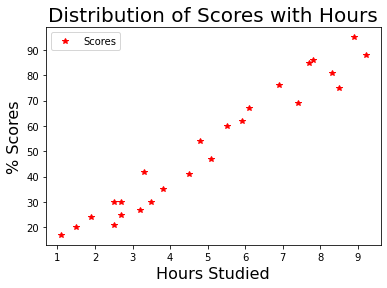

In [112]:
data.plot(x="Hours",y="Scores",style="*",c="r",)
plt.title("Distribution of Scores with Hours",fontsize=20)
plt.xlabel("Hours Studied",fontsize=16)
plt.ylabel("% Scores",fontsize=16)

plt.show()


### Divide Data into Attributes(input) and Labels(output)

In [113]:
x=data.iloc[:,:1].values
y=data.iloc[:,1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Split the data into Training and Test set

In [114]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.25, random_state=0) 

### Training the Algorithm

In [115]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Plot the Best_fit_line/Regression line

<function matplotlib.pyplot.show(*args, **kw)>

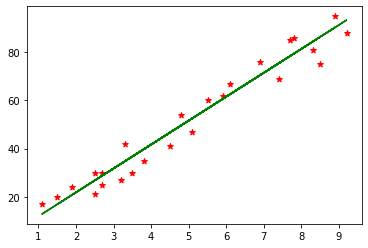

In [116]:
Best_fit_line= model.coef_*x+model.intercept_
plt.scatter(x,y,color="red",marker="*")
plt.plot(x,Best_fit_line,color="green")
plt.show

In [117]:
# slope and intercept of best_fit_line

print("slope of Best_fit_line is:",model.coef_)
print("intercept of Best_fit_line is:",model.intercept_)

slope of Best_fit_line is: [9.94167834]
intercept of Best_fit_line is: 1.932204253151646


###  Predict the Output

In [118]:
print(x_test)
y_pred=model.predict(x_test)
print("y_pred=",y_pred)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
y_pred= [16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


### comparing Actual vs Predicted

In [119]:
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_data

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


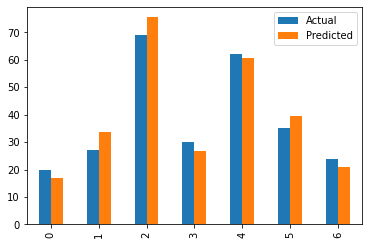

In [120]:
pred_data.plot(kind='bar')

### Predict own data input

In [121]:
hours = [[9.25]] ## predict score at 9.25 hours studied
own_pred = model.predict(hours)
print("No of Hours studied =",hours)
print("Predicted Score =",own_pred[0])

No of Hours studied = [[9.25]]
Predicted Score = 93.89272889341655


### Model Evaluation

In [122]:
# r_squared_value

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9367661043365055

In [123]:
### Performance of Model

# mean_absolute_error
# mean_squared_error
# root_mean_squared_error

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
